$\min_{x \in R^2}4 - x_{1}^2 - x_{2}^2 + x_{1}^4 + x_{2}^4$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [5]:
## Define Cost function
def f(x):
  return 4 - x[0]**2 - x[1]**2 + x[0]**4 + x[1]**4

In [6]:
## Define gradient 
def gradf(x):
  return np.array([4*(x[0]**3) - 2*x[0], 4*(x[1]**3) - 2*x[1]])

In [7]:
## Define steepest descent method

def steepest_gradient_descent(x,alpha=0.1,epsilon=1e-4):
  prev_x = x
  converged = False
  iters = 0
  fig = plt.figure()
  ax = fig.add_subplot()
  trace = []
  trace.append(x)
  while not converged:
    #print("Iteration: ", iters, "x: ", x, "f(x):", f(x),"next step size: ",alpha)
    d = -gradf(x)
    prev_x = x 
    x = x + alpha*d
    iters += 1
    converged = np.linalg.norm(prev_x-x) < epsilon
    trace.append(x)
  plot_state(x, trace, ax, fig)
  return x

In [17]:
def plot_state(x, trace, ax, fig):
    
    curr_x1, curr_x2 = x[0], x[1]
    ax.clear()

    # Make data.
    X = np.arange(-1, 1, 0.001)
    Y = np.arange(-1, 1, 0.001)
    X, Y= np.meshgrid(X, Y)
    Z = np.array([f(np.array([x1,x2])) for x1,x2 in zip(X,Y)])

    trace_x, trace_y = [x[0] for x in trace], [x[1] for x in trace]

    # Plot the surface.
    '''surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis,
                        linewidth=0, antialiased=False, zorder=0)'''
    plt.contour(X, Y, Z)
    #plt.scatter(trace_x, trace_y, color = 'm')
    for i in range(1, len(trace_x)):
        plt.arrow(trace_x[i], trace_y[i], trace_x[i] - trace_x[i-1], trace_y[i] - trace_y[i-1], head_width = 0.02)
    plt.colorbar()
    display(fig)
    clear_output(wait = True)
    #plt.pause(1)

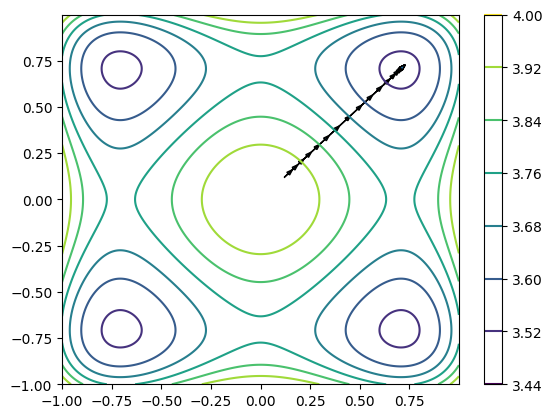

In [31]:
x = np.array([0.1, 0.1])
x_opt_sg = steepest_gradient_descent(x)

In [10]:
print(x_opt_sg)

[0.70701507 0.70701507]
